<div class="alert alert-success" role="alert"><h3>Data Analytics for Strategic Decision Makers </h4></div>

# 1. Case Study: Mental Health

People with  **mental disorders** experience disproportionately higher rates of disability and mortality. For example, persons with major depression and schizophrenia have a 40% to 60% greater chance of dying prematurely than the general population. Suicide is the second most common cause of death among young people worldwide. Less than half of the 139 countries that have mental health policies and plans report having these aligned with human rights conventions. (https://www.who.int/)

The World Health Organisation(WHO) wants to provide companies  know :

* How does the frequency of mental health illness and attitudes towards mental health vary by **geographic location** ?
* What are the strongest predictors of mental health illness and specific attitudes towards mental health in the **workplace**?



#  2. Collect / Load Data

For this case study, I have been collected the data from the survey of the Open Sourcing Mental Illness website, [OSMI](https://osmihelp.org/) made the survey in 2016 With over 1400 responses, the 2016 survey aimed to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.
- First of all, I have changed columns' names in Excel becuase the columns' names were the questions in survey and were so long as a column's name. 
- I have removed some questions from the data set cause my initial thoughts on them was that I don't need them for my analysis. I will add them if I needed.  
- I liked to use data from recent survey 2019 but, it has just about 300 participants. The data may not be as reliable as a larger dataset.  
- This survey is mostly from people who are working in Tech Companies but there are some other participants as well. 
- I think when we analyse this data then we can use this for other servey as well with non tech workers. 

In [1]:
import sys
!{sys.executable} -m pip install nltk

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import the required Python libraries to process the data:

import numpy as np  
import pandas as pd # used for data manipulation and data analysis
import matplotlib.pyplot as plt    # used for visualisation
import seaborn as sns

 
# Naive Bayes libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes Classifier based on a Bernoulli Distribution
from sklearn.naive_bayes import GaussianNB       # Naive Bayes Classifier based on a Gaussian Distribution
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes Classifier based on a Multinomial Distribution

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

import re

import collections

import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords # Use for text mining
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading data

Let's start with loading dataset and have look at it.

In [5]:
filename = "MentalHealth_2016.csv"

# load the .csv dataset
data = pd.read_csv(filename)

# take a look at the whole of dataset
data


,self_employed,no_employee,is_techcompany,is_techrelated,is_benefitprovided,is_care_options_available,is_mentalhealth_discussed,is_resources_offered,is_anonymity_protected,request_leave,...,is_interferes_being,is_interferes_not_being,age,gender,country_live,us_state_live,country_work,us_state_work,work_position,is_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [6]:
response = data.shape[0]
question = data.shape[1]
print('There are %d participants for %d questions in the data.' % (response,question))

There are 1433 participants for 55 questions in the data.


**QUESTION:** 
- What do the **rows** and **columns** of this dataset **represent**?
- Is the dataset complete?

**ANSWER HERE**
- **Rows** represent the **responses** of each **person** that has attended to the survey.
- **Columns** represent the **questions** of the **survey**.

In [7]:
data.describe(include=['O'])

,no_employee,is_benefitprovided,is_care_options_available,is_mentalhealth_discussed,is_resources_offered,is_anonymity_protected,request_leave,is_negative_discussing_mentalhealth,is_negative_discussing_physicalhealth,is_coworker,...,is_diagnosed_by_professional_what_condition,is_interferes_being,is_interferes_not_being,gender,country_live,us_state_live,country_work,us_state_work,work_position,is_remote
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


# 3. Data Cleaning

**Question:** Is there any dupliacted data in our data set?

In [8]:
data.duplicated(keep=False).value_counts()

False    1433
dtype: int64

**ANSWER**
- There is no duplicated data in our data set.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 55 columns):
self_employed                                     1433 non-null int64
no_employee                                       1146 non-null object
is_techcompany                                    1146 non-null float64
is_techrelated                                    263 non-null float64
is_benefitprovided                                1146 non-null object
is_care_options_available                         1013 non-null object
is_mentalhealth_discussed                         1146 non-null object
is_resources_offered                              1146 non-null object
is_anonymity_protected                            1146 non-null object
request_leave                                     1146 non-null object
is_negative_discussing_mentalhealth               1146 non-null object
is_negative_discussing_physicalhealth             1146 non-null object
is_coworker                              

First sight:
- There are some missing values, need to decide what to do about them.
- Age has some values that are too low or too high to be real ages.
- Gender has 3 missing value and also lots of different values, needs to be cleaned.  
- Other fields that I am going to use, have no missing value. 


###  Cleaning the Age 

Age will be used in the analysis and prediction, so it needs to be checked. 

**Question** Is there any missing value or outliner in column age?


In [10]:
# let's see what is minimum and maximum of age and double check for missing value.
print("Minimum value of age: ", data["age"].min())
print("Maximum value of age: ", data["age"].max())
print("How many values are NaN?: ", pd.isnull(data['age']).sum())

Minimum value of age:  3
Maximum value of age:  323
How many values are NaN?:  0


We assume the minimum age of 15 years old and the maximum of 75 years old for people who attended to the the survey.

create a function to check all of age between 15 and 75 and replace any outliers with the average of the column age.


In [11]:
def age_check(age):
    if age>=15 and age<=75:
        return age
    else:
        return  data['age'].mean() #np.nan replaced by the average 
data['age'] = data['age'].apply(age_check)

**Answer:** 

There are 3 outliers values in the column age, we are going to replace them with the average of age, which is 30.  
Replaced 3 outliers value of age with **the average** of age from age column. 


This graph is showing the distribution of age values in our survey.

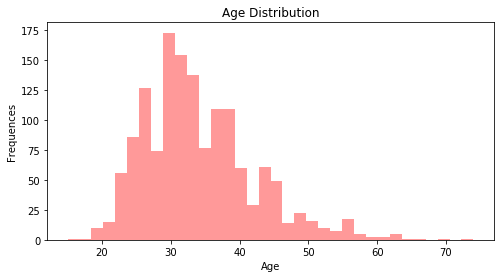

In [12]:
fig,ax = plt.subplots(figsize=(8,4))
sns.distplot(data['age'],ax=ax,kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequences')
plt.show()

As we can see the average of age of participants is 30 years old. Also, we approximately have applicants in age range of 25-40.
It means the 

### Gender Cleaning 

**Question** How does the column of gender look like? Is there any missing or wrong value there?

In [13]:
# let's see what we have unique!
list_genders = data['gender'].unique()
print(list_genders)

['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'Other' 'nb masculine' 'Cisgender Female' 'Man'
 'Sex is male' 'none of your business' 'genderqueer' 'cis male' 'Human'
 'Genderfluid' 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender'
 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer'
 'cisdude' 'Genderflux demi-girl'


**Answer** There are lots of different spellings and wrong value available in the Gender column, I am going to separate all words or letters related to male, female and other and replace them with correct and unique value,  1 for male 2 for female and 3 for other.

- First standardize all column headers to lower case.
- Second separate all letters and words related to male, female and trans.
- Third replace them with the unique value.
- Find missing value and fill them with other , there are 3 null values.



In [14]:
data['gender'] = data['gender'].str.lower()

In [15]:
# Replacing all kind of different spelling of male to 1 which is male

data['gender'].replace(to_replace = ['male', 'male ','m','man','cis male', 'male.','male (cis)','sex is male','malr',
                                     'mail', 'm|', 'cis man',
                                     "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? "],
                       value = 'Male', inplace = True)

In [16]:
# Replacing all kind of different spelling of female to 2 which is female

data['gender'].replace(to_replace = ['female', 'i identify as female.','female ' ,' female','female (props for making this a freeform field, though)',
       'female assigned at birth ', 'f', 'woman', 'fm', 'f', 'cis female ', 'female or multi-gender femme', 'cis-woman',
       'female/woman','cisgender female', 'fem',
       'female-bodied; no feelings about gender'], value = 'Female', inplace = True)

In [17]:
# Replacing all kind of different spelling of trans to 3 which is other 

data['gender'].replace(to_replace = ['bigender', 'non-binary', 'transitioned, m2f',
       'other/transfeminine', 'androgynous', 'male 9:1 female, roughly',
       'nan', 'other', 'nb masculine', 'none of your business',
       'genderqueer', 'human', 'genderfluid', 'enby', 'genderqueer woman','genderfluid (born female)' ,
       'mtf', 'queer', 'agender', 'dude', 'fluid','male/genderqueer', 'nonbinary', 'unicorn', 'cisdude','male (trans, ftm)', 'transitioned' ,
       'genderflux demi-girl', 'afab', 'transgender woman'], value = 'Other', inplace = True)

In [18]:
# how many null value is in gender
data['gender'].isna().sum()

3

In [19]:
# fill 3 records of null values for gender with 3 which is other
data['gender'] = data['gender'].fillna('Other')

In [20]:
data.groupby('gender').gender.count()

gender
Female     340
Male      1055
Other       38
Name: gender, dtype: int64

Approximately **74%** or 1055/1433 of participants are Male and **24%** or 340/1433 Female and about 2% other gender.

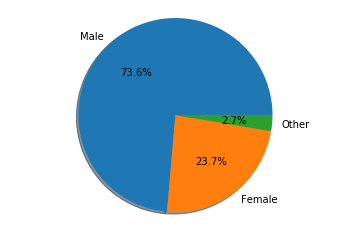

In [21]:
# pie chart of employees
labels = ['Male', 'Female', 'Other']
sizes = [(data.gender == 'Male').value_counts()[1],
         (data.gender == 'Female').value_counts()[1],
         (data.gender == 'Other').value_counts()[1],
                 ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

### Country Cleaning

Country is going to lead us answering the questions that we have been asked in case study.

**Questions:** 

 What is the distribution of countries like? any missing value? 



In [22]:
#Checking missing values
data['country_live'].isna().sum()

0

In [23]:
print("Country Count =", len(set(data['country_live'])))
print("Country Names =", set(data['country_live']))
print(data['country_live'].describe())

Country Count = 53
Country Names = {'Sweden', 'Switzerland', 'Taiwan', 'Mexico', 'Australia', 'Colombia', 'Austria', 'New Zealand', 'Netherlands', 'Canada', 'Ireland', 'Serbia', 'Brazil', 'Ecuador', 'Greece', 'Bulgaria', 'Algeria', 'Finland', 'Czech Republic', 'Vietnam', 'Poland', 'South Africa', 'Spain', 'Belgium', 'Brunei', 'Iran', 'Bosnia and Herzegovina', 'Other', 'Hungary', 'Italy', 'Lithuania', 'India', 'France', 'Pakistan', 'Afghanistan', 'Slovakia', 'Argentina', 'Japan', 'United States of America', 'China', 'Guatemala', 'United Kingdom', 'Chile', 'Venezuela', 'Russia', 'Norway', 'Israel', 'Germany', 'Bangladesh', 'Estonia', 'Romania', 'Denmark', 'Costa Rica'}
count                         1433
unique                          53
top       United States of America
freq                           840
Name: country_live, dtype: object


**Answer** 
- There is no missing value in our data set.
- We have a total of 53 countries.
- Frequency of US participant is 840 out of 1430.


**Question**

- Is there any missing value in **state** column? How is the distribution like?


In [24]:
print("State Count =", len(set(data['us_state_live'])))
print("State Names =", set(data['us_state_live']))
print(data['us_state_live'].describe())

State Count = 48
State Names = {nan, 'West Virginia', 'Ohio', 'Rhode Island', 'North Carolina', 'Pennsylvania', 'Missouri', 'South Carolina', 'Florida', 'Michigan', 'Minnesota', 'Utah', 'New Mexico', 'North Dakota', 'Louisiana', 'Wisconsin', 'Tennessee', 'Virginia', 'Alaska', 'Nevada', 'Delaware', 'Vermont', 'Alabama', 'Kentucky', 'Oklahoma', 'South Dakota', 'Montana', 'New York', 'Arizona', 'Iowa', 'Georgia', 'California', 'Maine', 'Idaho', 'District of Columbia', 'Washington', 'New Jersey', 'Kansas', 'Oregon', 'Texas', 'Illinois', 'Nebraska', 'Colorado', 'Massachusetts', 'Connecticut', 'New Hampshire', 'Indiana', 'Maryland'}
count            840
unique            47
top       California
freq             130
Name: us_state_live, dtype: object


**Answer**
- Yes, there are some missing but, If the country is US , state has been filled totally, otherwise, it is null which is fine.
- High frequency state is California with 130 applicants. 
- US's participants are from 47 different states in our servey.

# 4. Analysis/Visualisation 

Let's analyse current diagnosed mental health with different aspects


**Question:**

- How many  or what percentage of people have been diagnosed with mental health issues regaridng to survey?



There are Two questions asked in the survey that we can use to answer this question.
- Do you currently have a mental health disorder? The answers are Yes, No, Maybe
- Have you been diagnosed with a mental health condition by a medical professional? Yes, No

In [25]:
# How many participants are in ?
data_recordes = data.is_current_mentalhealth.count()
# all people said they have mental health OR they might have mental health 

current_mentalhealth_yes = data[data.is_current_mentalhealth == 'Yes'].is_current_mentalhealth.count()
current_mentalhealth_maybe =data[data.is_current_mentalhealth == 'Maybe'].is_current_mentalhealth.count()
#diagnosed_yes_maybe = data[(data.is_current_mentalhealth == 'Yes') | (data.is_current_mentalhealth == 'Maybe')].is_current_mentalhealth.count()
print(' ')
print(str(current_mentalhealth_yes)+ " people from "+str(data_recordes)+ " OR " + '{0:.2f}'.format((current_mentalhealth_yes / data_recordes * 100))+ "% of "  + " people have said they have mental health disorder")
print(str(current_mentalhealth_maybe)+ " people from "+str(data_recordes)+ " OR " + '{0:.2f}'.format((current_mentalhealth_maybe / data_recordes * 100))+ "% of "  + " people have said they may have mental health disorder")
      
# all people who diagnosed by professional
diagnosed_by_professional = data[data.is_diagnosed_by_professional == 'Yes' ].is_diagnosed_by_professional.count()
print(str(diagnosed_by_professional) + " people from "+str(data_recordes)+ " OR " + '{0:.2f}'.format((diagnosed_by_professional / data_recordes * 100))+ "% of " + " people have said they have diagnosed by a profesional.")


 
575 people from 1433 OR 40.13% of  people have said they have mental health disorder
327 people from 1433 OR 22.82% of  people have said they may have mental health disorder
716 people from 1433 OR 49.97% of  people have said they have diagnosed by a profesional.


**Answer** 

We am going to use data from people who said thay have been diagnosed by a professianal, the column's name is **is_diagnosed_by_professional** and the question is **Have you been diagnosed with a mental health condition by a medical professional?** , 
This field looks more reliable than  other field that we have in survey because : 
- Some people said they don't have mental health now but they said that they have been diagnosed by professional.
- Some people said Yes or Maybe to current mental health  however they said No to dioagnosed by professional, there is no certainty that they really have mental health issue.
So the assumpion is  the people who said diagnosed by a professional, they certainly have got mental health.

**Question** Which country does have more people who diagnosed with mental health disorder?


In [26]:
total_diagnosed = data[data.is_diagnosed_by_professional == 'Yes'].groupby('country_live')['is_diagnosed_by_professional'].count().sum()
all_non_diagnosed = data[data.is_diagnosed_by_professional == 'No'].groupby('country_live')['is_diagnosed_by_professional'].count().sum()
data['country_live'].value_counts()

print("")
print("From 1433 all participants %d peaple have been diagnosed with mental health issue" % (total_diagnosed)+" which is about "  + '{0:.2f}'.format((total_diagnosed/data.groupby('country_live').size().sum())*100)+ "% of total participants.")
print("")
print('Frequency of top 10 participants by country:')
print("")
print(data['country_live'].value_counts().head(10))
print("")
print('Frequency of top 10 diagnosed with mental health participants by country:')
print("")
print(data.country_live[data['is_diagnosed_by_professional'] == 'Yes' ].count(),data[data.is_diagnosed_by_professional == 'Yes'].groupby('country_live')['is_diagnosed_by_professional'].count().sort_values(ascending=False).head(10))



From 1433 all participants 716 peaple have been diagnosed with mental health issue which is about 49.97% of total participants.

Frequency of top 10 participants by country:

United States of America    840
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Name: country_live, dtype: int64

Frequency of top 10 diagnosed with mental health participants by country:

716 country_live
United States of America    473
United Kingdom               76
Canada                       31
Netherlands                  25
Australia                    24
Germany                      21
Ireland                       8
Sweden                        7
Switzerland                   6
France                        5
Name: is_diagnosed_by_professional, dtype: int64


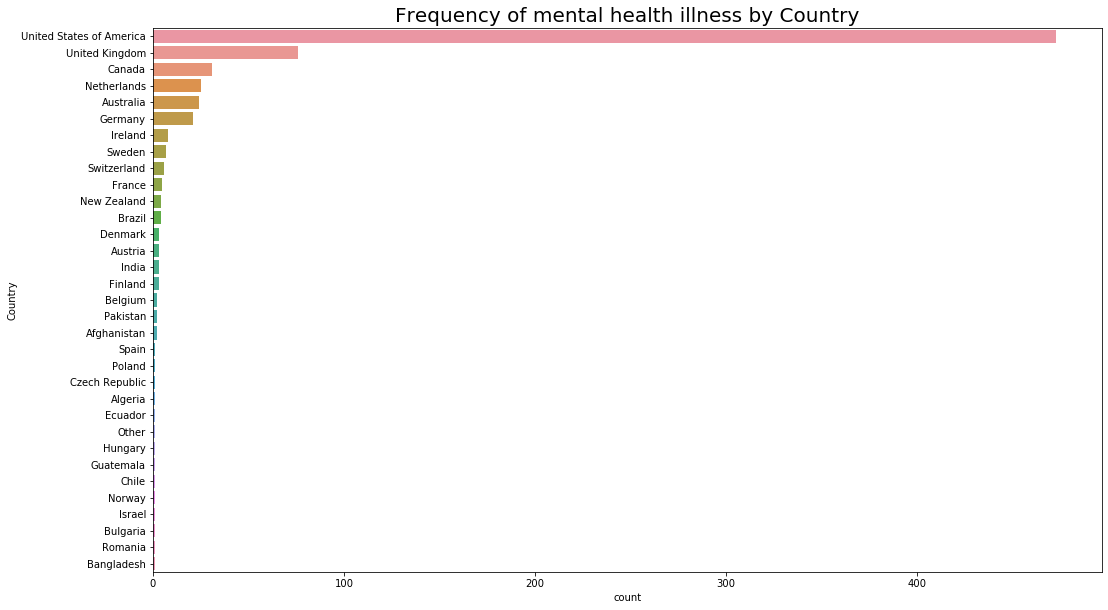

In [27]:
#Frequency of mental health illness by Country
all_diagnosed = data[(data.is_diagnosed_by_professional == 'Yes')  ]
plt.figure(figsize=(17, 10))
sns.countplot(y='country_live', order = all_diagnosed['country_live'].value_counts().index, data=all_diagnosed)
plt.title('Frequency of mental health illness by Country', fontsize=20)
plt.ylabel('Country')
plt.show()

The above plot shows us that USA has more frequency of mental health issues compare to other countries, we have to aware that USA also has more participants in th esurvey than other countries. 
We are going to select 6 countries where have more participants in the survey to compare the frequency of mental health issues with them.

In [28]:
# all participants from 6 top countries where have participated more and ratio of people who have daignosed to who haven't in each country
data_top_country_participant = data[(data.country_live == 'United States of America') | (data.country_live == 'United Kingdom') | (data.country_live == 'Canada') | (data.country_live == 'Germany')   
                                         | (data.country_live == 'Netherlands') | (data.country_live == 'Australia') ] 
data_top_country_participant.groupby('country_live').size() 
data_top_country_participant[data_top_country_participant.is_diagnosed_by_professional == 'Yes'].groupby('country_live')['is_diagnosed_by_professional'].count()
top_diagnosed = (data_top_country_participant[data_top_country_participant.is_diagnosed_by_professional == 'Yes'].groupby('country_live')['is_diagnosed_by_professional'].count()/data_top_country_participant.groupby('country_live').size())*100


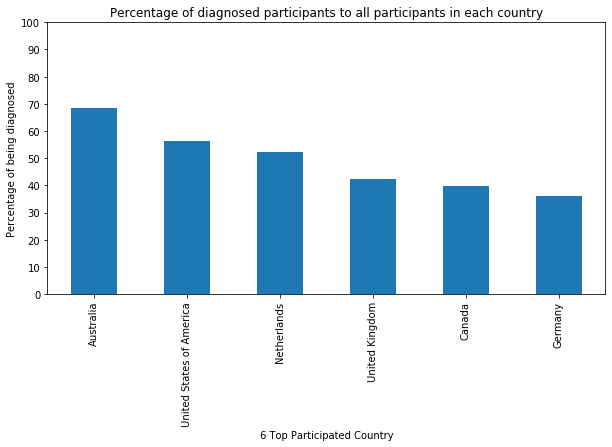

In [29]:
# Plot of proportion of diagnosed participants compare to the whole participants of its country.
# It means, according to the number of paricipants in Australi, how many of them were diagnosed. 
# Then compare with other countries. 

plt.figure(figsize=(10,5))
top_diagnosed.sort_values(ascending = False).plot(kind='bar', title = 'Percentage of diagnosed participants to all participants in each country' )
plt.xlabel('6 Top Participated Country')
plt.ylabel('Percentage of being diagnosed')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 110, 10))
plt.show()

- If we calculate the percentage of diagnosed participants to all participants in each country, as we can see in Australia, the ratio of people who are diagnosed with a mental health issue is about 70% which means from 100% participannts, 70% have been diagnosed with MH issue while  in Germany, less than 40% of its participants have been diagnosed.
- But, on average in these 6 countries about 50% of people who participated in the survey have been diagnosed with the mental health issues.
- The graph below also compares the  the proportion of the participants who have been diagnosed with mental health issues to all participants from the particular country. 

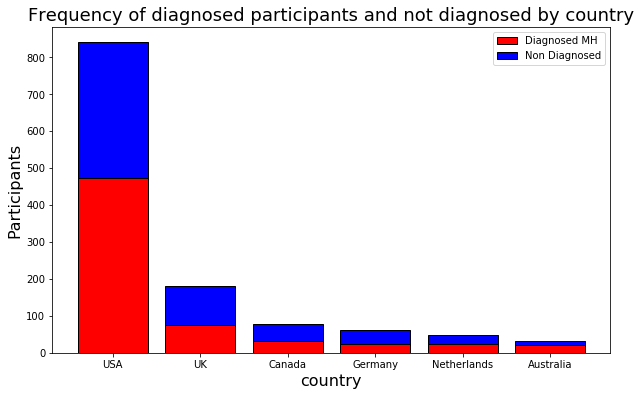

In [30]:
# Frequency of diagnosed participants and not diagnosed by country

country=['USA','UK','Canada','Germany','Netherlands','Australia']
position=['Diagnosed MH','Non Diagnosed']

pos = np.arange(len(country))
participant_Index_non_diagnosed=data_top_country_participant[data_top_country_participant.is_diagnosed_by_professional == 'No'].groupby('country_live')['is_diagnosed_by_professional'].count().sort_values(ascending= False)
participant_Index_diagnosed=data_top_country_participant[data_top_country_participant.is_diagnosed_by_professional == 'Yes'].groupby('country_live')['is_diagnosed_by_professional'].count().sort_values(ascending= False)

plt.figure(figsize=(10,6))
plt.bar(pos,participant_Index_diagnosed, color='red',edgecolor='black')
plt.bar(pos,participant_Index_non_diagnosed,color='blue',edgecolor='black',bottom=participant_Index_diagnosed)
plt.xticks(pos, country)
plt.xlabel('country', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.title('Frequency of diagnosed participants and not diagnosed by country',fontsize=18)
plt.legend(position,loc='upper right')
plt.show()

*************************************************************************

Now, let's see how does the frequency of **attitudes toward mental health** vary by these **6 countries** to answer the what we have in business concern.

>**Question** How does the frequency of attitudes towards mental health vary by geographic location?

- First, we look at the gender  distribution.
- Second, we are going to see how is the proportion of applicants who are working in a tech company.
- Then, we analyse the participants' answers to some questions that were asked in the survey ralated to attitudes toward mental health.
- There are some main questions in the survey that lead us to some interesting analysis.
 - How willing would you be to share with friend and family that you have a mental illness?
 - Would you bring up a mental health issue with a potential employer in an interview?
 - Do you feel that being identified as a person with a mental health issue would hurt your career?
 - Does your employer provide mental health benefits as part of health coverage? 

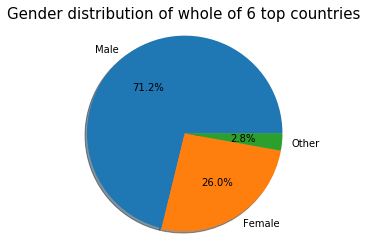

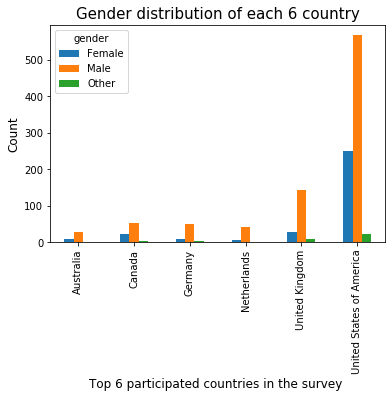

In [31]:
# gender distribution
df_top = data_top_country_participant.copy()

# pie chart of diagnosed people based on gender
labels = ['Male', 'Female', 'Other']
sizes = [(df_top.gender == 'Male').value_counts()[1],
         (df_top.gender == 'Female').value_counts()[1],
         (df_top.gender == 'Other').value_counts()[1],
                 ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Gender distribution of whole of 6 top countries" , fontsize=15)


# bar chart for visualisation of distribution of gender in each 6 country
ax = df_top.groupby('gender').country_live.value_counts().unstack(0).plot.bar()
ax.set_xlabel("Top 6 participated countries in the survey ",fontsize=12)
ax.set_title("Gender distribution of each 6 country" , fontsize=15)
ax.set_ylabel("Count",fontsize=12)
plt.show()

**Question** 
How does the frequency of employees who work in Tech or non Tech companies?

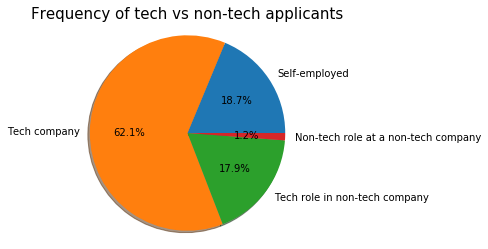

In [32]:
# pie chart of employee's workplace, whole applicants from 6 countries
labels = ['Self-employed', 'Tech company', 'Tech role in non-tech company', 'Non-tech role at a non-tech company']
sizes = [df_top['self_employed'].value_counts()[1],
         df_top['is_techcompany'].value_counts()[1],
         df_top['is_techrelated'].value_counts()[1],
         df_top['is_techrelated'].value_counts()[0]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title("Frequency of tech vs non-tech applicants", fontsize=15)
ax1.axis('equal')
plt.show()

**Answer**
In this survey most of participants are working in tech company or having a tech role in their company. 
Approximately 30% of participants are self-employed or work in non-tech complanies.

The bar chart shows the number of men and women and other genders in participants of the survey, based on 6 countries who has been diagnosed with mental health. According to gender and as is observed from the graph, the number of men is more than the other type of people, and men also diagnosed with mental health issue more than other genders.

### *How willing would you be to share with friend and family that you have a mental illness?*

This question was asked in the survey, let's see how the answer would be. We will check it with 6 top participated countries.

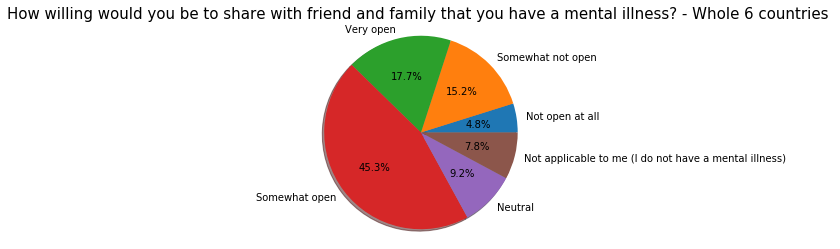

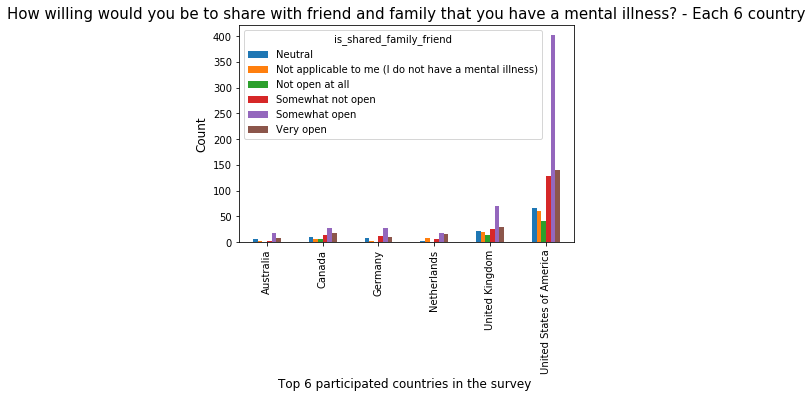

In [33]:
# pie chart for whole 6 country 
labels = ['Not open at all', 'Somewhat not open','Very open',  'Somewhat open',  'Neutral' ,'Not applicable to me (I do not have a mental illness)']
sizes = [(df_top.is_shared_family_friend == 'Not open at all').value_counts()[1],
         (df_top.is_shared_family_friend == 'Somewhat not open').value_counts()[1],
          (df_top.is_shared_family_friend == 'Very open').value_counts()[1],
         (df_top.is_shared_family_friend == 'Somewhat open').value_counts()[1],
         (df_top.is_shared_family_friend == 'Neutral').value_counts()[1],
        (df_top.is_shared_family_friend == 'Not applicable to me (I do not have a mental illness)').value_counts()[1] ]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.set_title("How willing would you be to share with friend and family that you have a mental illness? - Whole 6 countries " , fontsize=15)
ax.axis('equal')


# bar chart for comparing  each country 
ax = df_top.groupby('is_shared_family_friend').country_live.value_counts().unstack(0).plot.bar()
ax.set_xlabel("Top 6 participated countries in the survey ",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("How willing would you be to share with friend and family that you have a mental illness? - Each 6 country", fontsize=15)
plt.show()


- More than 60% of participants said that they will share their mental health issue with family af friend. 
- Approximately 20% said not at all or somewhat not open. It is a notable amount for family and friend. It means that people have a hesitation to talk about mental health issues at home.
- The rest are neutral. 


### *Would you bring up a mental health issue with a potential employer in an interview?*

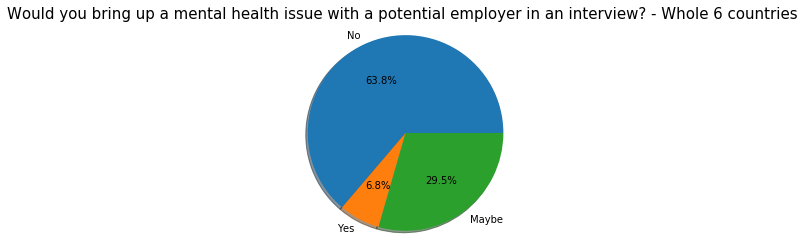

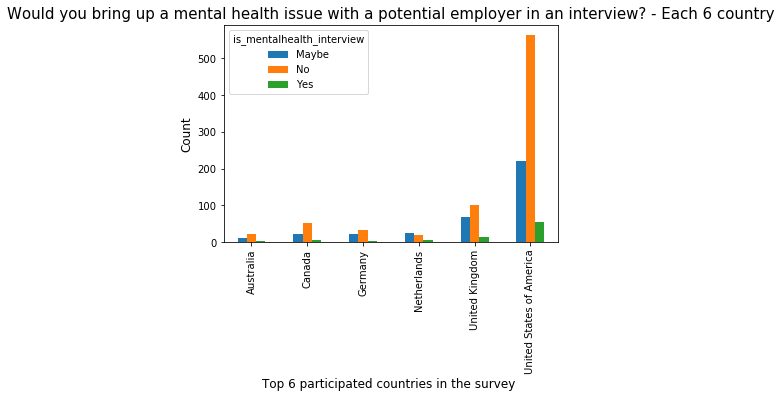

In [34]:
# pie chart for whole 6 country 
labels = ['No', 'Yes', 'Maybe']
sizes = [(df_top.is_mentalhealth_interview == 'No').value_counts()[1],
         (df_top.is_mentalhealth_interview == 'Yes').value_counts()[1],
          (df_top.is_mentalhealth_interview == 'Maybe').value_counts()[1]]
fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title("Would you bring up a mental health issue with a potential employer in an interview? - Whole 6 countries ", fontsize=15 )
ax1.axis('equal')

# bar chart for comparing  each country 
ax = df_top.groupby('is_mentalhealth_interview').country_live.value_counts().unstack(0).plot.bar()
ax.set_xlabel("Top 6 participated countries in the survey ",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Would you bring up a mental health issue with a potential employer in an interview? - Each 6 country", fontsize=15)
print('')

- Majority of participants said that they do not bring up a mental health issue in a job interview. There should be some real issues with workplaces.
- Compare to family and friend, people do not want to say anything about their mental health issue to employers, the assumption is that would be a negative consequences.
- Not only US, this bar chart displays that in all 6 countries, clearly the answer no is huge.

### *Do you feel that being identified as a person with a mental health issue would hurt your career?*

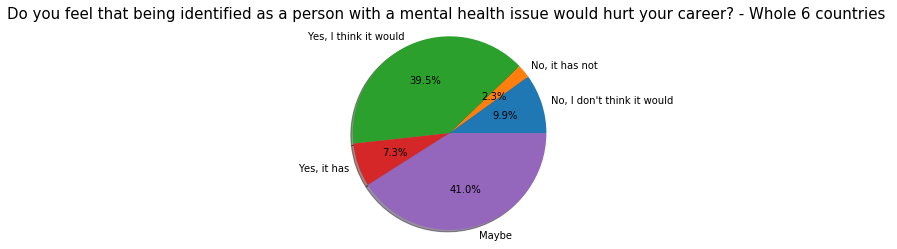

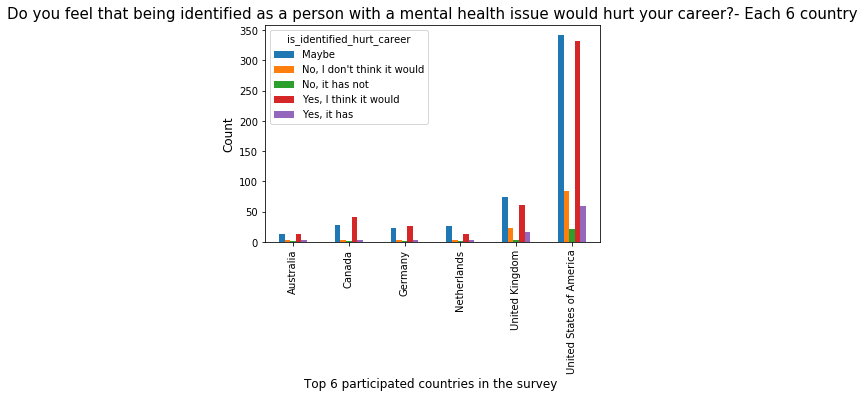

In [35]:
# pie chart for whole 6 country 
labels = ["No, I don't think it would", 'No, it has not', 'Yes, I think it would', 'Yes, it has' ,'Maybe']
sizes = [(df_top.is_identified_hurt_career =="No, I don't think it would").value_counts()[1],
         (df_top.is_identified_hurt_career == 'No, it has not').value_counts()[1],
          (df_top.is_identified_hurt_career == 'Yes, I think it would').value_counts()[1],
        (df_top.is_identified_hurt_career == 'Yes, it has').value_counts()[1],
         (df_top.is_identified_hurt_career == 'Maybe').value_counts()[1]
        ]
fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title("Do you feel that being identified as a person with a mental health issue would hurt your career? - Whole 6 countries ", fontsize=15 )
ax1.axis('equal')

# bar chart for comparing  each country 
ax = df_top.groupby('is_identified_hurt_career').country_live.value_counts().unstack(0).plot.bar()
ax.set_xlabel("Top 6 participated countries in the survey ",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Do you feel that being identified as a person with a mental health issue would hurt your career?- Each 6 country" , fontsize=15)
print('')

- According to the earlier question as well, with this chart, it is obvious that there is a fear of getting hurt in the workplace. 
- About 50% of participants have answered yes it would. and 40% have selected maybe. They are not sure what is going to happen if being identified as a person with a mental health issue.

### *Does your employer provide mental health benefits as part of health coverage?*

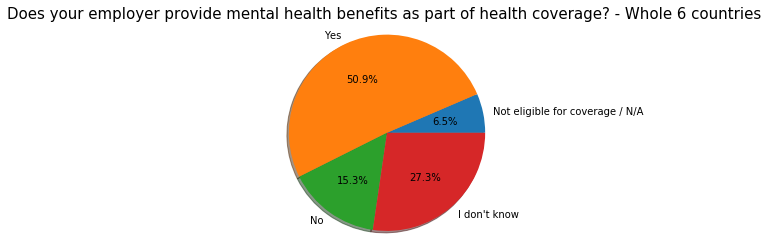

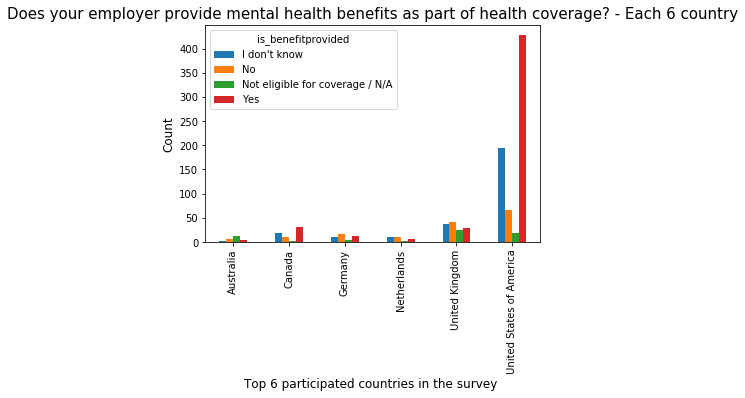

In [36]:
labels = ['Not eligible for coverage / N/A', 'Yes',  'No', "I don't know"]
sizes = [(df_top.is_benefitprovided == 'Not eligible for coverage / N/A').value_counts()[1],
         (df_top.is_benefitprovided == 'Yes').value_counts()[1],
          (df_top.is_benefitprovided == 'No').value_counts()[1],
         (df_top.is_benefitprovided == "I don't know").value_counts()[1]]
               
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_title("Does your employer provide mental health benefits as part of health coverage? - Whole 6 countries ", fontsize=15 ) 
ax1.axis('equal')
plt.show()


ax = df_top.groupby('is_benefitprovided').country_live.value_counts().unstack(0).plot.bar()
ax.set_xlabel("Top 6 participated countries in the survey ",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Does your employer provide mental health benefits as part of health coverage? - Each 6 country", fontsize=15)
print('')


- It is interesting that about 27% of participant said that "they don't know". It means they don't know their right, or there was no information provided. 
- Half a people said the mental health benefits are provided which is good news, but just providing benefits is not enough for people to be relaxed to talk about mental health issues.

**Question:**

Did participants who have been diagnosed with a mental health issue, attend treatment?

In [37]:
((df_top[(df_top.is_diagnosed_by_professional == 'Yes') & (df_top.is_treatment_by_professional == 0)].count()[0])/(df_top.is_diagnosed_by_professional == 'Yes').count())*100

2.340597255851493

As a result there some people who have been diagnosed by a professional but still have not sought any treatment. 

In [38]:
((df_top[(df_top.is_mentalhealth_discussed == 'Yes') & (df_top.is_diagnosed_by_professional == 'Yes')].count()[0])/(df_top.is_diagnosed_by_professional == 'Yes').count())*100

8.797417271993544

************************

# Prediction

We are going to use **NaiveBayes** for prediction.
For Model NaiveBayes we need numerical values, so let's convert our needed columns' values to numeric.

#### Preparing

******************************

#### Family is converted to numeric

In [39]:
# family history values are string, converte it to numeric
def family_numeric(family):
    if family=='No' :
        return 0
    elif family=='Yes':
        return 1
    elif family=="I don't know":
        return  2
    else:
        data['is_family_history']
data['is_family_history'] = data['is_family_history'].apply(family_numeric)

#### Gender is converted to numeric

In [40]:
# gender valus convert to numeric
def gender_rename(gender):
    if gender=='Male':
        return 1
    elif gender=='Female':
                return  2
    else:
                return  3
data['gender'] = data['gender'].apply(gender_rename)

#### is_diagnosed_by_professional is converted to numeric

In [41]:
# is_diagnosed_by_professional column convert to numeric
def diagnosed_numeric(diagnosed):
    if diagnosed=='Yes':
        return 1
    else:
        return  0
data['is_diagnosed_by_professional'] = data['is_diagnosed_by_professional'].apply(diagnosed_numeric)

#### is_interferes_being column is converted to numeric

In [42]:
# is_interferes_being converts to numeric , the question is : 
#"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"
def interferes_numeric(interferes):
    if interferes=='Often':
        return 1
    elif interferes=='Sometimes':
                return  2
    elif interferes=='Rarely':
                return  3
    elif interferes=='Never':
                return  4  
    else:
                return  5
   
data['is_interferes_being'] = data['is_interferes_being'].apply(interferes_numeric)

In [43]:
# bring mental health to interview, is_mentalhealth_interview is converted to numeric
def interview_numeric(interview):
    if interview=='No':
        return 0
    elif interview=='Yes':
        return 1
    else:
        return  2
data['is_mentalhealth_interview'] = data['is_mentalhealth_interview'].apply(interview_numeric)

In [44]:
# data['is_techcompany']

data["is_techcompany"].fillna(0, inplace = True) 

********************************

**Question** What are the strongest predictors of mental health illness in the workplace?

According to the age and gender, what is the prediction of if a person is diagnosed with a mental health issue?
With 2 features age and gender, we have got about 50-55% accuracy when another feature which was family history added to the feature the accuracy improved a bit to approx 65-70%.
So, with more features, the possibility of accuracy could be improved. After adding family history, we added another feature which was self-employed, it made the accuracy a bit better, but the next feature which was about working in tech did not improve anymore.

In [45]:
y = data['is_diagnosed_by_professional'] # data to be trained
X = data[['age','gender']] # feature

#func_plot_gaussian( data )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 800)      # random of 800 give 57% accuracy

# Define the NaiveBayes Gaussian kernel
model_full = GaussianNB()

# Fit a model to the data -> learning the model
model_full.fit( X_train, y_train )

# Use the learned model to try to predict the tumors on the testset
y_predicted = model_full.predict(X_test)

# Measure the overall accuracy of the model
accuracy = accuracy_score( y_test, y_predicted )*100 
 
print("Gaussian Naive Bayes model accuracy(in %):", accuracy)

Gaussian Naive Bayes model accuracy(in %): 57.674418604651166


In [46]:
y = data['is_diagnosed_by_professional'] # data to be trained
X = data[['age','gender','is_family_history', 'self_employed' , 'is_techcompany']] # features

#func_plot_gaussian( data )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 400)      # random of 900,400 70%, 92~72%

# Define the NaiveBayes Gaussian kernel
model_full = GaussianNB()

# Fit a model to the data -> learning the model
model_full.fit( X_train, y_train )

# Use the learned model to try to predict the tumors on the testset
y_predicted = model_full.predict(X_test)

# Measure the overall accuracy of the model
accuracy = accuracy_score( y_test, y_predicted )*100 #  print( 'The overall accuracy of the model is %.2f%%' %(accuracy_score( y_test, y_prediction )*100))
print("Gaussian Naive Bayes model accuracy(in %):", accuracy)

Gaussian Naive Bayes model accuracy(in %): 67.44186046511628


In [47]:
y = data['is_diagnosed_by_professional'] # data to be trained
X = data[['is_family_history','is_interferes_being']] # features

#func_plot_gaussian( data )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 600)      # random of 600 85%

# Define the NaiveBayes Gaussian kernel
model_full = GaussianNB()

# Fit a model to the data -> learning the model
model_full.fit( X_train, y_train )

# Use the learned model to try to predict the tumors on the testset
y_predicted = model_full.predict(X_test)

# Measure the overall accuracy of the model
accuracy = accuracy_score( y_test, y_predicted )*100 #  print( 'The overall accuracy of the model is %.2f%%' %(accuracy_score( y_test, y_prediction )*100))
print("Gaussian Naive Bayes model accuracy(in %):", accuracy)

Gaussian Naive Bayes model accuracy(in %): 81.86046511627907


It gave us accuracy of features ("is_family_history", "is_interferes_being") would be higher **but** it is not a appropiate and reliable choices for features, because the feature "is_interferes_being" from the question "If you have a MH issue, do you feel that it interferes with yur work when being treated effectively" which is related to the predicted filed. At the begining of the question is asking if you have mental health, so someone who has answered this question as "yes" is someone who already has MH issue.
So, **Strongest** prodictors are **age**, **gender** , **family_history**

**************************

**Question** what are the strongest predictors of specific **attitudes towards mental health** in the workplace?

Let's check "is_mentalhealth_interview" and then "is_treatment_by_professional" and "is_previous_mentalhealth".

### Possible fields can be used as attitude.
is_negative_discussing_mentalhealth,
is_benefitprovided,
is_treatment_by_professional,
is_previous_mentalhealth,

### Possible features
age,
gender,
is_family_history,
is_techcompany,
self_employed


***********************

According to the age and gender and family history of mental health,
what is the prediction of if a person would bring up the mental health issue with the potential employer in the interview?

In [48]:
y = data['is_mentalhealth_interview'] # data to be trained
X = data[['age','gender','is_family_history']] # features

#func_plot_gaussian( data )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 250    )                         

# Define the NaiveBayes Gaussian kernel
model_full = GaussianNB()

# Fit a model to the data -> learning the model
model_full.fit( X_train, y_train )

# Use the learned model to try to predict the tumors on the testset
y_predicted = model_full.predict(X_test)

# Measure the overall accuracy of the model
accuracy = accuracy_score( y_test, y_predicted )*100 #  print( 'The overall accuracy of the model is %.2f%%' %(accuracy_score( y_test, y_prediction )*100))
print("Gaussian Naive Bayes model accuracy(in %):", accuracy)

Gaussian Naive Bayes model accuracy(in %): 62.558139534883715


According to the age and gender and family history of mental health,
what is the prediction of if a person would seek treatment for a mental health issue from a medical professional? 

In [49]:
# Acoording to the age and gender and family history of mental health,
# what is the possibility of prediction of if a person would bring up the mental health issue with the potential employer in the interview.

y = data['is_treatment_by_professional'] # data to be trained
X = data[['age','gender','is_family_history','self_employed']] # features

#func_plot_gaussian( data )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 250)      #250~69%                       

# Define the NaiveBayes Gaussian kernel
model_full = GaussianNB()

# Fit a model to the data -> learning the model
model_full.fit( X_train, y_train )

# Use the learned model to try to predict the tumors on the testset
y_predicted = model_full.predict(X_test)

# Measure the overall accuracy of the model
accuracy = accuracy_score( y_test, y_predicted )*100 #  print( 'The overall accuracy of the model is %.2f%%' %(accuracy_score( y_test, y_prediction )*100))
print("Gaussian Naive Bayes model accuracy(in %):", accuracy)

Gaussian Naive Bayes model accuracy(in %): 60.46511627906976


According to the age and gender and family history of mental health,
what is the prediction of if a person has had a mental health disorder in the past? 

In [50]:
y = data['is_previous_mentalhealth'] # data to be trained
X = data[['age','gender','is_family_history','self_employed']] # features

#func_plot_gaussian( data )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 250)      #250~69%                       

# Define the NaiveBayes Gaussian kernel
model_full = GaussianNB()

# Fit a model to the data -> learning the model
model_full.fit( X_train, y_train )

# Use the learned model to try to predict the tumors on the testset
y_predicted = model_full.predict(X_test)

# Measure the overall accuracy of the model
accuracy = accuracy_score( y_test, y_predicted )*100 #  print( 'The overall accuracy of the model is %.2f%%' %(accuracy_score( y_test, y_prediction )*100))
print("Gaussian Naive Bayes model accuracy(in %):", accuracy)

Gaussian Naive Bayes model accuracy(in %): 62.32558139534884


# 6. Insights

With this analysis, we found the following:

* Approximately, half of participants of survey have mental health issue which is significant result. However, it could be a selection bias; this occurs when data is selected subjectively. As we have more participants from tech companies. It is not a good reflection of the population.

* Among this analysis, we observed that the USA has more frequency of mental health issues compared to the other countries.
* Considerably, people who are not sure or are certain of future negative consequences, in the workplace or at home after talking about their mental health is still huge to be ignored.
* In reality, people are starting to pay much more attention and being more accepting to the mental health disorders. Just 20% of participants are not talking about it with family and friends although most people have a big fear of negative consequences at work. It means, mental health disorders still being viewed with a rigid mentality.
* Since we analysed countries like USA, Australia, UK, Canada and Some European countries, the result of attitude toward mental health issues were quite the same. Slightly in Netherland, the result was a bit reasonable.
* The lack of information that employees have and the lack of information that employers are providing (seek help, wellness campaign, mental health care), there is a possibility that some people are missing out potentially beneficial treatment. There might be some who wants to discuss with the supervisor or co-workers but there is no welcoming.
